<a href="https://colab.research.google.com/github/atodorovska/VNP-Exercises/blob/main/%D0%92%D0%9D%D0%9F_22_23_%D0%90%D1%83%D0%B4%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D1%81%D0%BA%D0%B0_%D0%B2%D0%B5%D0%B6%D0%B1%D0%B0_8_(%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D1%83%D0%B2%D0%B0%D1%9A%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Аудиториска вежба 8: Neural Networks & Deep Learning - LSTM

In [ ]:
#Note: File location https://drive.google.com/file/d/10xd_Zk0Ld_GlonTOFLNpuLyThOyi-hvq/view?usp=sharing.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби (Споделени фајлови)/datasets/exercise 08/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
import seaborn as sns

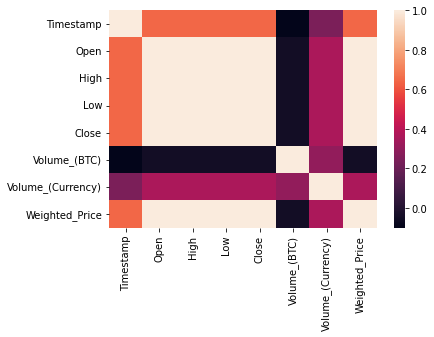

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.columns[:5]

Index(['Timestamp', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.drop(df.columns[1:4], axis=1,inplace=True)

In [ ]:
df.drop(df.columns[-3:], axis=1,inplace=True)

In [ ]:
df

,Timestamp,Close
0,1325317920,4.39
1,1325317980,4.39
2,1325318040,4.39
3,1325318100,4.39
4,1325318160,4.39
...,...,...
4857372,1617148560,58686.00
4857373,1617148620,58685.81
4857374,1617148680,58723.84
4857375,1617148740,58760.59


In [ ]:
matrix = []
for i in range(len(df['Close'])-1, 2, -1):
  
  day3=df['Close'][i-3]
  day2=df['Close'][i-2]
  day1=df['Close'][i-1]
  matrix.append([df['Close'][i], day1, day2, day3])

matrix

[[58778.18, 58760.59, 58723.84, 58685.81],
 [58760.59, 58723.84, 58685.81, 58686.0],
 [58723.84, 58685.81, 58686.0, 58714.31],
 [58685.81, 58686.0, 58714.31, 58739.95],
 [58686.0, 58714.31, 58739.95, 58698.5],
 [58714.31, 58739.95, 58698.5, 58699.9],
 [58739.95, 58698.5, 58699.9, 58699.9],
 [58698.5, 58699.9, 58699.9, 58689.44],
 [58699.9, 58699.9, 58689.44, 58644.13],
 [58699.9, 58689.44, 58644.13, 58677.7],
 [58689.44, 58644.13, 58677.7, 58702.79],
 [58644.13, 58677.7, 58702.79, 58666.54],
 [58677.7, 58702.79, 58666.54, 58600.0],
 [58702.79, 58666.54, 58600.0, 58600.0],
 [58666.54, 58600.0, 58600.0, 58608.38],
 [58600.0, 58600.0, 58608.38, 58620.59],
 [58600.0, 58608.38, 58620.59, 58616.33],
 [58608.38, 58620.59, 58616.33, 58616.33],
 [58620.59, 58616.33, 58616.33, 58616.45],
 [58616.33, 58616.33, 58616.45, 58600.2],
 [58616.33, 58616.45, 58600.2, 58642.47],
 [58616.45, 58600.2, 58642.47, 58628.24],
 [58600.2, 58642.47, 58628.24, 58669.75],
 [58642.47, 58628.24, 58669.75, 58728.74],


In [ ]:
df = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])

In [ ]:
df

,Close,One day ago,Two days ago,Three days ago
0,58778.18,58760.59,58723.84,58685.81
1,58760.59,58723.84,58685.81,58686.00
2,58723.84,58685.81,58686.00,58714.31
3,58685.81,58686.00,58714.31,58739.95
4,58686.00,58714.31,58739.95,58698.50
...,...,...,...,...
4857369,4.39,4.39,4.39,4.39
4857370,4.39,4.39,4.39,4.39
4857371,4.39,4.39,4.39,4.39
4857372,4.39,4.39,4.39,4.39


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
df = df[:5000]

In [ ]:
test = df[:int(len(df)*0.2)]
train = df[int(len(df)*0.2):]

In [ ]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [ ]:
X_train

,One day ago,Two days ago,Three days ago
1000,58075.75,58039.91,58089.12
1001,58039.91,58089.12,58025.83
1002,58089.12,58025.83,58037.51
1003,58025.83,58037.51,58031.89
1004,58037.51,58031.89,58048.90
...,...,...,...
4995,54158.38,54092.69,54076.99
4996,54092.69,54076.99,54113.86
4997,54076.99,54113.86,54151.52
4998,54113.86,54151.52,54128.68


In [ ]:
Y_train

1000    58075.75
1001    58075.75
1002    58039.91
1003    58089.12
1004    58025.83
          ...   
4995    54064.89
4996    54158.38
4997    54092.69
4998    54076.99
4999    54113.86
Name: Close, Length: 4000, dtype: float64

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape

(4000, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

(4000, 1, 3)

In [ ]:
model = Sequential()
# return sequences се пишува само на влезен слој
model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_17 (LSTM)              (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
#Кај timeseries битно ни е shuffle=False
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)

Epoch 1/200
200/200 [==============================] - 2s 4ms/step - loss: 3197497600.0000 - mean_absolute_error: 56537.0312 - val_loss: 3087231232.0000 - val_mean_absolute_error: 55558.6562
Epoch 2/200
200/200 [==============================] - 1s 3ms/step - loss: 3173991936.0000 - mean_absolute_error: 56328.1250 - val_loss: 3022354176.0000 - val_mean_absolute_error: 54964.4336
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 3039906048.0000 - mean_absolute_error: 55122.4297 - val_loss: 2813648640.0000 - val_mean_absolute_error: 52988.9414
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 2702065920.0000 - mean_absolute_error: 51947.0664 - val_loss: 2420105216.0000 - val_mean_absolute_error: 48967.5352
Epoch 5/200
200/200 [==============================] - 1s 3ms/step - loss: 2159754496.0000 - mean_absolute_error: 46340.0664 - val_loss: 1884953984.0000 - val_mean_absolute_error: 42657.3516
Epoch 6/200
200/200 [========================

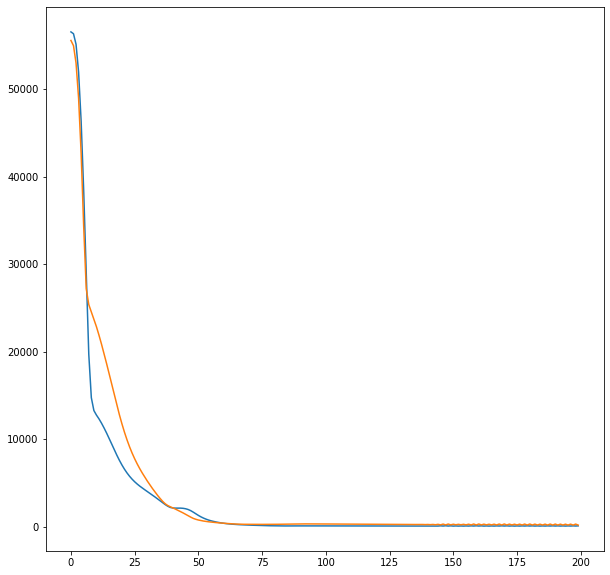

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[62686.297],
       [62376.484],
       [62323.5  ],
       [62538.023],
       [62596.81 ],
       [62552.73 ],
       [62375.984],
       [62340.223],
       [62117.74 ],
       [62029.22 ],
       [62061.637],
       [62162.215],
       [61869.945],
       [61464.41 ],
       [61214.605],
       [61291.72 ],
       [61356.68 ],
       [61392.766],
       [61375.043],
       [61313.066],
       [61415.258],
       [61450.133],
       [61737.4  ],
       [62064.617],
       [62381.74 ],
       [62752.344],
       [62767.63 ],
       [62950.54 ],
       [62911.99 ],
       [62857.406],
       [62805.375],
       [62569.64 ],
       [62385.14 ],
       [61974.555],
       [61734.805],
       [61498.67 ],
       [61598.68 ],
       [61590.31 ],
       [61640.203],
       [61485.27 ],
       [61446.492],
       [61486.855],
       [61781.86 ],
       [62222.016],
       [62516.117],
       [62600.562],
       [62479.   ],
       [62556.875],
       [62382.953],
       [62064.32 ],


In [ ]:
from sklearn.metrics import r2_score

r2_score(Y_test,y_pred)

-265.07099203070703

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,y_pred)

4689.319762343749